DNA SEQUENCE PREDICTION

In [1]:
#importing all dependencies
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data
data=pd.read_csv('train.csv.xls')
data["Sequence"].values[123]


'GPEPTYEDFDEKLFREKLRKSTKKIKPYLLEQTLVAGLGNIYVDEVLWLAKIHPEKETNQLIESSIHLLHDSIIEILQKAIKLGGSSI'

In [3]:
#Encoding the label DNA & NDNA
data.replace({"Type":{"DNA":1,"NDNA":0}},inplace=True)

In [4]:
#labeling the columns
X_data=data["Sequence"]
y_data=data["Type"]

In [5]:
#finding the probability of each letter in a seq
def probability(seq):
    dict = {}
    for n in seq:
        keys = dict.keys()
        if n in keys:
            dict[n] += 1/len(seq)
        else:
            dict[n] = 1/len(seq)
            
    return dict

In [6]:
#probabilities of each letter in x_data
def get_seq(x_train):
    list_dict = []
    
    for seq in x_train:
        dic = probability(seq)
        list_dict.append(dic)    
    return list_dict

In [7]:
protien_sequence = ['A','C','D','E','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

In [8]:
#computing final vector of each sequence 
def getvector(vector_dictionary):
    final_vector = []
    
    for dic in vector_dictionary:
        vec = [0.0] * 20
        for item in dic:
            for seq in protien_sequence:
                if seq == item:
                    index = protien_sequence.index(seq)
                    vec[index] = dic[item]
                    
        final_vector.append(vec)            
    
    return final_vector

In [9]:
## computng the final vectors
training_vector_dict = get_seq(X_data)
X_new_data = getvector(training_vector_dict)


Splitting the data into training and testing data

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_new_data,y_data,train_size=0.8,random_state=0)

LogisticRegression 

              precision    recall  f1-score   support

           0       0.89      0.58      0.70       513
           1       0.22      0.64      0.33        97

    accuracy                           0.59       610
   macro avg       0.56      0.61      0.52       610
weighted avg       0.79      0.59      0.65       610



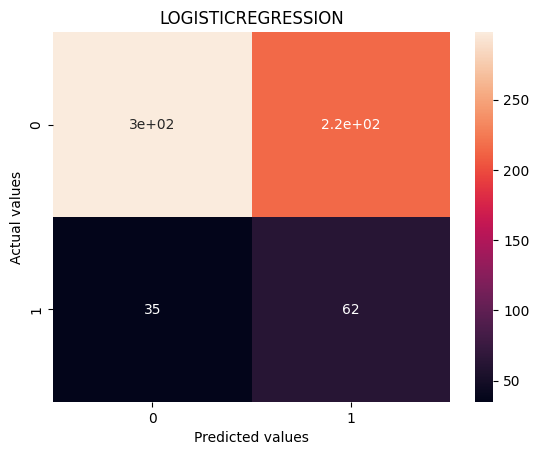

In [11]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
logreg=LogisticRegression(max_iter=len(X_train))
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
accu=accuracy_score(y_pred,y_test)
accu*100
clf=classification_report(y_pred,y_test)
print(clf)
con_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("LOGISTICREGRESSION")
plt.show()

SVM

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       347
           1       0.68      0.72      0.70       263

    accuracy                           0.73       610
   macro avg       0.73      0.73      0.73       610
weighted avg       0.74      0.73      0.74       610



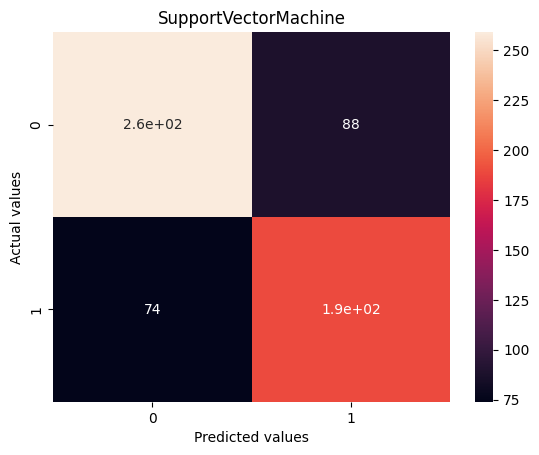

In [12]:
from sklearn.svm import SVC 
svm=SVC().fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred=svm.predict(X_test)
accu=accuracy_score(y_pred,y_test)
accu*100
clf=classification_report(y_pred,y_test)
print(clf)
y_pred=svm.predict(X_test)
con_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("SupportVectorMachine")
plt.show()

Naive Bayes

              precision    recall  f1-score   support

           0       0.65      0.73      0.69       297
           1       0.71      0.63      0.66       313

    accuracy                           0.68       610
   macro avg       0.68      0.68      0.68       610
weighted avg       0.68      0.68      0.67       610



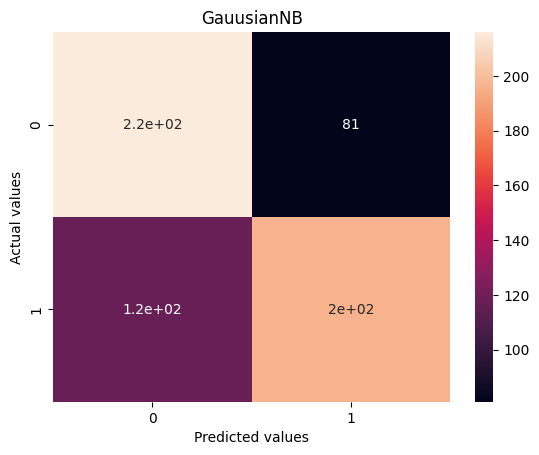

In [13]:
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,y_train)
y_pred=gauss.predict(X_test)
accu=accuracy_score(y_pred,y_test)
accu*100
clf=classification_report(y_pred,y_test)
print(clf)
y_Pred=gauss.predict(X_test)
con_mat=confusion_matrix(y_Pred,y_test)
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("GauusianNB")
plt.show()

knn

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       319
           1       0.71      0.68      0.70       291

    accuracy                           0.72       610
   macro avg       0.72      0.72      0.72       610
weighted avg       0.72      0.72      0.72       610



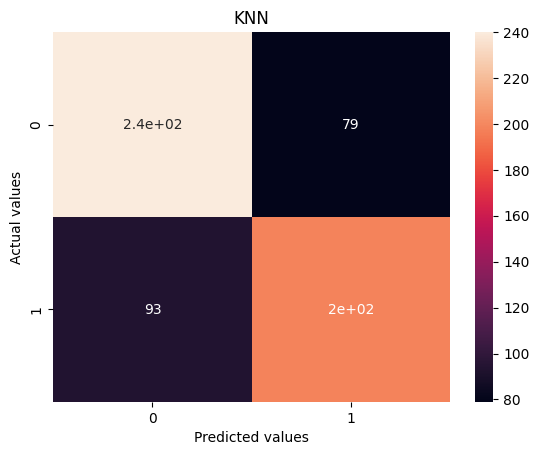

In [14]:
from sklearn.neighbors import KNeighborsClassifier 
knn=KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)
y_pred=knn.predict(X_test)
accu=accuracy_score(y_pred,y_test)
accu*100
clf=classification_report(y_pred,y_test)
print(clf)
y_pred=knn.predict(X_test)
con_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("KNN")
plt.show()

DecisionTreeClassifierm

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       341
           1       0.56      0.58      0.57       269

    accuracy                           0.62       610
   macro avg       0.61      0.61      0.61       610
weighted avg       0.62      0.62      0.62       610



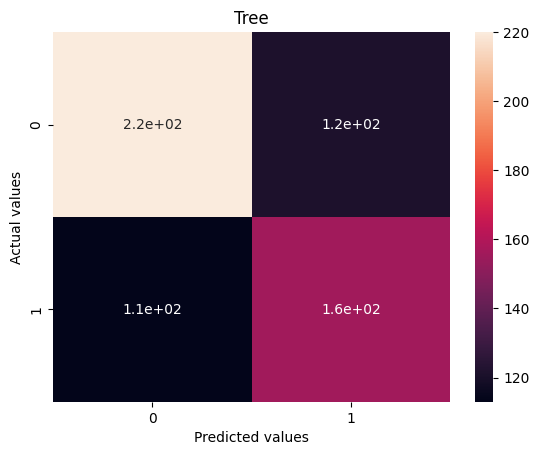

In [15]:
from sklearn.tree import DecisionTreeClassifier 
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree.score(X_test,y_test)
y_pred=tree.predict(X_test)
accu=accuracy_score(y_pred,y_test)
accu*100
clf=classification_report(y_pred,y_test)
print(clf)
con_mat=confusion_matrix(y_pred,y_test)
sns.heatmap(con_mat,annot=True)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Tree")
plt.show()

In [16]:
print('From all above classifiers KNN & SVM is showing more accuracy i.e 0.72 & 0.73')

From all above classifiers KNN & SVM is showing more accuracy i.e 0.72 & 0.73


In [17]:
import tkinter as tkinter
from tkinter import *
window=tkinter.Tk()
window.title("DNA sequence")
image=PhotoImage(file="DNA.png")
label3=tkinter.Label(window,image=image)
label3.place(x=0,y=0)
window.geometry("800x600")
dnadata=tkinter.StringVar()
label=Label(window,text="DNA Sequence ",font=("arial",20),borderwidth=0,fg="red",bg="#00008B")
label.place(x=10,y=100)
label4=Label(window,text="PROTEIN BINDING SEQUENCE PREDICTOR",fg="green",bg="yellow",font=('Helvetica',25),highlightcolor="red")
label4.place(x=50,y=10)
entry=Entry(textvariable=dnadata,font=('arial',20),borderwidth=0)
entry.place(x=250,y=105)
class predictions:
    def __init__(self):
        self.label1=tkinter.Label()
        self.label2=tkinter.Label()
        self.label3=tkinter.Label()
    def predict(self):
            newdata=dnadata.get()
            x=[probability(newdata)]
            X_new_data = getvector(x)
            print(X_new_data)
            y_pred=svm.predict(X_new_data)
            print(y_pred)
            if len(newdata)==0:
                self.label3=Label(window,text="Please enter a DNA sequence",font=('arial',20))
                self.label3.place(x=200,y=200)
            else:    
                if y_pred == 1:
                    self.label1=Label(window,text="YES",font=('arial',20))
                    self.label1.place(x=350,y=200)

                else:
                    self.label2=Label(window,text="NO",font=('arial',20))
                    self.label2.place(x=350,y=200)
    def reset(self):
        entry.delete(0,END)
    def clear(self):
        self.label1.after(1000,self.label1.destroy())
        self.label2.after(1000,self.label1.destroy())
        self.label3.after(1000,self.label3.destroy())
pred=predictions()
button=Button(window,text="submit",font=("arial",20),fg="red",bg="#00008B",command=pred.predict,borderwidth=0)
button.place(x=100,y=300)
button1=Button(window,text="reset",font=('arial',20),fg="red",bg="#00008B",command=pred.reset,borderwidth=0)
button1.place(x=300,y=300)
button2=Button(window,text="clear",font=('arial',20),fg="red",bg="#00008B",command=pred.clear,borderwidth=0)
button2.place(x=500,y=300)
window.mainloop()